In [10]:
import pandas as pd
import numpy as np 

In [12]:
df=pd.read_csv('diabetes.csv')

In [14]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [18]:
for column in df.columns[1:-3]:
    df[column].replace(0,np.NaN,inplace=True)
    df[column].fillna(round(df[column].mean(skipna=True)),inplace=True)

C:\Users\shubh\AppData\Local\Temp\ipykernel_7268\1851391816.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(0,np.NaN,inplace=True)
C:\Users\shubh\AppData\Local\Temp\ipykernel_7268\1851391816.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [20]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148.0,72.0,35.0,156.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,156.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,156.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,156.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,156.0,30.1,0.349,47,1


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X=df.drop(columns=['Outcome'])
Y=df['Outcome']

In [24]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,6,148.0,72.0,35.0,156.0,33.6,0.627,50
1,1,85.0,66.0,29.0,156.0,26.6,0.351,31
2,8,183.0,64.0,29.0,156.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,156.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,156.0,30.1,0.349,47


In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [32]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [36]:
Y_pred=knn.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,f1_score
print("Confusion Matrix")
print(confusion_matrix(Y_test, Y_pred))
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))
print("Reacal Score:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("Precision Score:",precision_score(Y_test, Y_pred))

Confusion Matrix
[[84 15]
 [21 34]]
Accuracy Score: 0.7662337662337663
Reacal Score: 0.6181818181818182
F1 Score: 0.6538461538461539
Precision Score: 0.6938775510204082


In [42]:
score=[]
for i in range(1,16):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    score.append(accuracy_score(Y_test,Y_pred))
    

In [44]:
score

[0.6558441558441559,
 0.6818181818181818,
 0.7142857142857143,
 0.7012987012987013,
 0.7402597402597403,
 0.7532467532467533,
 0.7012987012987013,
 0.7207792207792207,
 0.7207792207792207,
 0.7662337662337663,
 0.7532467532467533,
 0.7662337662337663,
 0.7532467532467533,
 0.7532467532467533,
 0.7597402597402597]

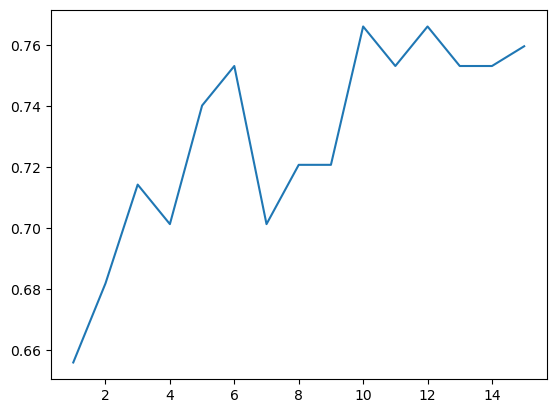

In [46]:
import matplotlib.pyplot as plt
plt.plot(range(1,16),score)

In [ ]:
for column in df.columns[1:-3]:
    df[column].replace(0,np.NaN,inplace=True)
    df[column].fillna(round(df[column].mean(skipna=True)),inplace=True)